# Math 134A Week 8

# Simple Linear Regression/Single Factor Model
Given a set of data points $\{(x_k, y_k)\}_1^n$ which are sampled from $Y = a+bX+\varepsilon$ where $X, Y, \varepsilon$ are random variables. We also assume that $E[\varepsilon] = 0$, and $\varepsilon$ is uncorrelated to $X$. The goal of the linear regression is to find the number $(a,b)$ so that the square error is minimized. In other words, we would like to minimize $\sum_{k=1}^n (y_k-a-bx_k)^2$. 

We denote $\mathbf{x} = (x_1,\ldots, x_n)$ and $\mathbf{y} = (y_1,\ldots, y_n)$. Then, we are finding $(a,b)$ which is the least square solution to 
$$\begin{bmatrix}1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n\end{bmatrix}\begin{bmatrix}a \\ b\end{bmatrix} = \begin{bmatrix}y_1 \\ y_2 \\ \vdots \\ y_n\end{bmatrix}$$
Let $A$ to be the matrix $\begin{bmatrix}1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n\end{bmatrix}$. Then the least square solution to this problem is 
$$\begin{bmatrix}a \\ b\end{bmatrix} = (A^TA)^{-1}A^T\mathbf{y}$$

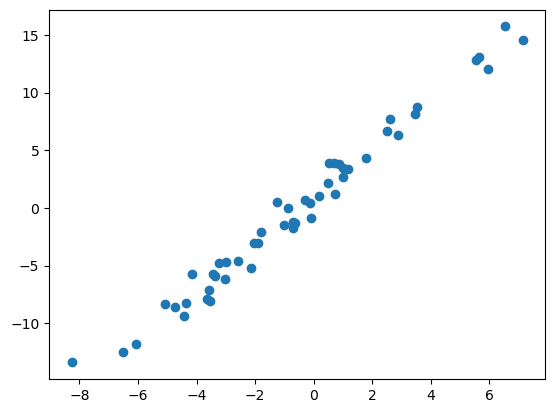

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

a = 1
b = 2

x = np.random.normal(0,4,50)
y = a + b * x + np.random.normal(0,1,50)

plt.scatter(x,y)
plt.show()

[[1.00294188 2.04286011]]


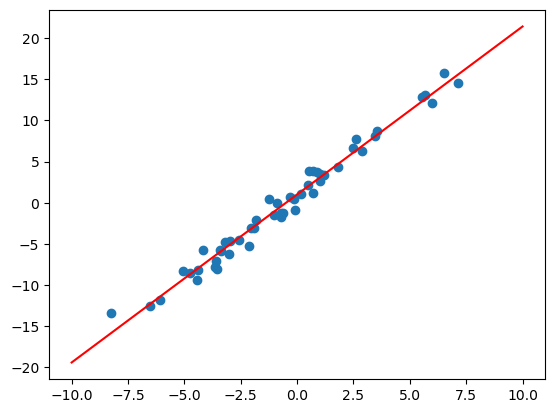

In [53]:
ones = np.ones(50)
A = np.matrix(np.column_stack((ones, x)))
w = inv(np.transpose(A).dot(A)).dot(np.transpose(A)).dot(y)
print(w)

x_list = np.linspace(-10, 10, 100)
y_list = w.item(0,0) + w.item(0,1) * x_list

plt.scatter(x,y)
plt.plot(x_list,y_list, color = 'red')
plt.show()

# Second way of solving linear regression
Another way to solve the coefficients $a,b$ is by the following observation. Since $Y = a+bX+\varepsilon$ where we assumed that $E[\varepsilon] = 0$ and $\varepsilon$ is uncorrelated to $X$. Thus, we have 
$$\begin{align}
 \overline{Y} & = a+b\overline{X} \\
 \text{Cov}(Y,X) &= b\text{Var}(X)
\end{align}$$

Thus, we have $b = \frac{\sigma_{X,Y}}{\sigma_X^2} = \frac{\sum_1^n (x_i-\overline{X})(y_i-\overline{Y})}{\sum_1^n (x_i-\overline{X})^2}$ 

In [54]:
x_mean = np.mean(x)
y_mean = np.mean(y)

cov_xy = 0
cov_xx = 0
for i in range(len(x)):
    cov_xy += (x[i] - x_mean) * (y[i] - y_mean)
    cov_xx += (x[i] - x_mean) ** 2

b_predicted = cov_xy/cov_xx
a_predicted = y_mean - b_predicted * x_mean

print("We predicted that a,b = ", a_predicted, ",", b_predicted)


We predicted that a,b =  1.0029418804218326 , 2.042860110231081


# Linear Regression with multiple coefficients/Multifactor Model
We are given data points $\{(x_k^{(1)},\ldots, x_k^{(n)}, y_k)\}_1^m$ sampled from $Y = a+b_1X^{(1)}+\cdots+b_nX^{(n)} + \varepsilon$. We assume that $X^{(i)}$ are uncorrelated, $E[\varepsilon] = 0$, $\varepsilon$ is uncorrelated to $X^{(i)}$. We would like to find the weights $a,b_1,\ldots, b_n$. 

This is the same as solving the least square problem 
$$\begin{bmatrix}1 & x_1^{(1)} & \cdots & x_1^{(n)} \\ \vdots & \vdots & \cdots & \vdots \\ 1 & x_m^{(1)} & \cdots & x_m^{(n)}\end{bmatrix}\begin{bmatrix}a \\ b_1 \\ \vdots \\ b_n \end{bmatrix} = \begin{bmatrix}y_1 \\ \vdots \\ y_m\end{bmatrix} $$

Then, the solution to the weight vector is $(A^TA)^{-1}A^T\mathbf{y}$

We also observe that 

$$\begin{align}
 \overline{Y} & = a+b_1\overline{X^{(1)}}+\cdots+b_n\overline{X^{(n)}} \\
 \text{Cov}(Y,X^{(1)}) &= b\text{Var}(X^{(1)}) \\
 \vdots \\
 \text{Cov}(Y,X^{(n)}) &= b\text{Var}(X^{(n)}) 
\end{align}$$


# Principal Component Analysis (PCA)
The goal of PCA is to reduce the dimensionality of data via projection while keeping most amount of information. 

Let $X = (X_1,\ldots, X_n)$ be a random vector, and $V = \begin{bmatrix}\sigma_{11} & \sigma_{12} & \cdots & \sigma_{1n} \\ \sigma_{21} & \sigma_{22} & \cdots & \sigma_{2n} \\ \vdots & \vdots & \cdots & \vdots \\ \sigma_{n1} & \sigma_{n2} & \cdots & \sigma_{nn}\end{bmatrix}$ be its covariance matrix. We see that $V$ is symmetric and positive semi-definite. By spectral theory, we know that $V$ orthogonally diagonalize. Let $\lambda_1\geq\lambda_2\geq\cdots\geq \lambda_n$ be its eigenvalues, and $\vec{w_1},\ldots, \vec{w_n}$ be the corresponding orthonormal eigenvectors. Then we call $\vec{w_1},\ldots, \vec{w_n}$ as the **principal components** of $X$, and $\vec{w}_1$ as the **first principal component**.

The goal of PCA is to maximize $\text{Var}(X\cdot \vec{v})$ where $\|\vec{v}\| = 1$. Geometrically speaking, we are projecting the random vector $X$ onto $\vec{v}$. and we want to find the direction $\vec{v}$ so that the projected random variables keeps the most amount of information from $X$ (which means that its variance is the largest). We claim that $\text{Var}(X\cdot \vec{v})$ is maximized when $\vec{v}$ is the first principal component $\vec{w}_1$. 

We first prove that $\text{Var}(X\cdot v) = v^TVv$. Let $v = (v_1,\ldots, v_n)$. We have 
$$\begin{align}
\text{Var}(X\cdot v) &= \text{Var}\left(\sum_1^n v_iX_i\right) \\ 
&= \sum_{i,j = 1}^n v_iv_j\text{Cov}(X_i, X_j) \\
&= v^TVv
\end{align}$$

Since $\{w_1,\ldots, w_n\}$ is an orthonormal basis, we can write $\vec{v} = c_1\vec{w_1}+\cdots+c_n\vec{w_n}$, and we have $1 = \|v\| = \sum_1^n c_i^2$. Then, by using the assumption that $w_i$ are eigenvector of $V$ corresponding to $\lambda_i$, we get
$$\begin{align}
\text{Var}(X\cdot v) &= (c_1w_1+\cdots+c_nw_n)^TV(c_1w_1+\cdots+c_nw_n) \\
&=(c_1w_1+\cdots+c_nw_n)^T(c_1\lambda_1w_1+\cdots+c_n\lambda_nw_n) \\
&= \sum_1^n \lambda_ic_i^2
\end{align}$$

Hence, we need to maximize $\sum_1^n \lambda_ic_i^2 $ given that $\sum c_i^2 = 1$ and $\lambda_1\geq\lambda_2\geq\cdots\geq \lambda_n$. We apply the Lagrange Multiplier method, and we see that the maximum is reached when $c_1 = 1$ and $c_i = 0$ for $i\neq 1$. Thus, $\text{Var}(X\cdot v)$ is maximized when $\vec{v}$ is the first principal component.

In data science, suppose we sampled $m$ data $X^{(1)}, X^{(2)}, \ldots, X^{(m)}$ from an $n$-dimensional random vector $X$. We put the data into a matrix 
$$\begin{bmatrix}X^{(1)} \\ \vdots \\ X^{(m)}\end{bmatrix}$$
where each row represents a data, and the number of columns is the dimension of data. (which is the number of factors in a multifactor model, or the number of features if you use the language of machine learning)

If we want to reduce the dimension of the data to $k$, Then, the data after the dimensionality reduction is 
$$\begin{bmatrix}X^{(1)} \\ \vdots \\ X^{(m)}\end{bmatrix}\cdot \begin{bmatrix}w_1 & w_2\cdots & w_k\end{bmatrix}$$
where $w_1,\ldots, w_k$ are the first $k$ components of the covariance matrix of the random vector $X$. 